In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd03f28ef-1a0e-4149-97ae-4049ef143967',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-08-07T07:50:28.018Z', 'error_code': 0, 'error_message': None, 'elapsed': 46, 'credit_count': 1, 'notice': None, 'total_count': 9445}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12278, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)



In [5]:
df = pd.json_normalize(data['data'])
df['timestamps'] = pd.to_datetime('now')
df



,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamps
0,1,Bitcoin,BTC,bitcoin,12278,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990305e+07,1.990305e+07,False,NaN,1,NaN,NaN,None,2025-08-07T07:49:00.000Z,114773.256063,5.563654e+10,-5.8024,0.006710,0.534057,-3.300049,5.858055,8.776622,10.235765,2.284338e+12,60.7538,2.410238e+12,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
1,1027,Ethereum,ETH,ethereum,10431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207093e+08,1.207093e+08,True,NaN,2,NaN,NaN,None,2025-08-07T07:49:00.000Z,3699.241345,2.616303e+10,-16.0360,-0.226474,1.697974,-4.332206,44.887940,47.096794,55.023557,4.465329e+11,11.8759,4.465329e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
2,52,XRP,XRP,xrp,1671,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-07T07:49:00.000Z,3.006290,4.240014e+09,-25.8005,-0.051220,1.883197,-4.552832,32.883095,36.341503,27.851780,1.782982e+11,4.7420,3.006290e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
3,825,Tether USDt,USDT,tether,140361,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.640397e+11,1.677832e+11,True,NaN,4,NaN,NaN,None,2025-08-07T07:48:00.000Z,1.000092,8.535106e+10,-11.7829,-0.004745,0.025291,0.022180,0.004150,-0.041308,0.011295,1.640547e+11,4.3632,1.677986e+11,None,2025-08-07T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 02:50:22.159382
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392881e+08,1.392881e+08,False,NaN,5,NaN,NaN,None,2025-08-07T07:49:00.000Z,767.322872,1.976076e+09,-1.7705,-0.088399,0.817578,-4.589709,16.267841,18.076366,20.891195,1.068790e+11,2.8425,1.068790e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
5,5426,Solana,SOL,solana,966,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.391327e+08,6.069012e+08,True,NaN,6,5.252369e+08,8.918879e+10,None,2025-08-07T07:49:00.000Z,169.806790,3.940597e+09,-17.7247,0.115661,3.481800,-6.278923,13.650026,13.444622,2.144195,9.154840e+10,2.4348,1.030559e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
6,3408,USDC,USDC,usd-coin,30291,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.462125e+10,6.462125e+10,False,NaN,7,6.090122e+10,6.088742e+10,None,2025-08-07T07:48:00.000Z,0.999773,1.054191e+10,-15.7483,-0.009462,-0.005538,-0.000056,-0.021416,-0.013131,-0.018082,6.460660e+10,1.7183,6.460660e+10,None,2025-08-07T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-07 02:50:22.159382
7,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470365e+10,9.470366e+10,True,NaN,8,7.165966e+10,2.433043e+10,None,2025-08-07T07:49:00.000Z,0.339528,9.047658e+08,0.5536,-0.161884,1.887074,4.363566,18.307970,18.738592,32.067946,3.215450e+10,0.8552,3.215450e+10,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:22.159382
8,74,Dogecoin,DOGE,dogecoin,1269,2013-12-15T00:00:00.000Z,"[mineable, po

In [6]:
import pandas as pd
import json
import time
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects


df = pd.DataFrame()

def app_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '20',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'd03f28ef-1a0e-4149-97ae-4049ef143967',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')

        df = pd.concat([df, df2], ignore_index=True)

        print("✅ API run completed.")

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("❌ API error:", e)


for i in range(4):
    app_runner()
    time.sleep(60)


save_path = r'C:\Users\bezis\OneDrive\Documents\crypto\crypto.csv'
print(f"Saving CSV to: {save_path}")
df.to_csv(save_path, index=False)




✅ API run completed.
✅ API run completed.
✅ API run completed.
✅ API run completed.
Saving CSV to: C:\Users\bezis\OneDrive\Documents\crypto\crypto.csv


In [7]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12278,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990305e+07,1.990305e+07,False,NaN,1,NaN,NaN,None,2025-08-07T07:49:00.000Z,114773.256063,5.563654e+10,-5.8024,0.006710,0.534057,-3.300049,5.858055,8.776622,10.235765,2.284338e+12,60.7538,2.410238e+12,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
1,1027,Ethereum,ETH,ethereum,10431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207093e+08,1.207093e+08,True,NaN,2,NaN,NaN,None,2025-08-07T07:49:00.000Z,3699.241345,2.616303e+10,-16.0360,-0.226474,1.697974,-4.332206,44.887940,47.096794,55.023557,4.465329e+11,11.8759,4.465329e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
2,52,XRP,XRP,xrp,1671,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-07T07:49:00.000Z,3.006290,4.240014e+09,-25.8005,-0.051220,1.883197,-4.552832,32.883095,36.341503,27.851780,1.782982e+11,4.7420,3.006290e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
3,825,Tether USDt,USDT,tether,140361,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.640397e+11,1.677832e+11,True,NaN,4,NaN,NaN,None,2025-08-07T07:48:00.000Z,1.000092,8.535106e+10,-11.7829,-0.004745,0.025291,0.022180,0.004150,-0.041308,0.011295,1.640547e+11,4.3632,1.677986e+11,None,2025-08-07T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 02:50:26.108049
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392881e+08,1.392881e+08,False,NaN,5,NaN,NaN,None,2025-08-07T07:49:00.000Z,767.322872,1.976076e+09,-1.7705,-0.088399,0.817578,-4.589709,16.267841,18.076366,20.891195,1.068790e+11,2.8425,1.068790e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
5,5426,Solana,SOL,solana,966,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.391327e+08,6.069012e+08,True,NaN,6,5.252369e+08,8.918879e+10,None,2025-08-07T07:49:00.000Z,169.806790,3.940597e+09,-17.7247,0.115661,3.481800,-6.278923,13.650026,13.444622,2.144195,9.154840e+10,2.4348,1.030559e+11,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
6,3408,USDC,USDC,usd-coin,30291,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.462125e+10,6.462125e+10,False,NaN,7,6.090122e+10,6.088742e+10,None,2025-08-07T07:48:00.000Z,0.999773,1.054191e+10,-15.7483,-0.009462,-0.005538,-0.000056,-0.021416,-0.013131,-0.018082,6.460660e+10,1.7183,6.460660e+10,None,2025-08-07T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-07 02:50:26.108049
7,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470365e+10,9.470366e+10,True,NaN,8,7.165966e+10,2.433043e+10,None,2025-08-07T07:49:00.000Z,0.339528,9.047658e+08,0.5536,-0.161884,1.887074,4.363566,18.307970,18.738592,32.067946,3.215450e+10,0.8552,3.215450e+10,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
8,74,Dogecoin,DOGE,dogecoin,1269,2013-12-15T00:00:00.000Z,"[mineable, pow

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12278,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19903053.00000,19903053.00000,False,NaN,1,NaN,NaN,None,2025-08-07T07:49:00.000Z,114773.25606,55636537140.79022,-5.80240,0.00671,0.53406,-3.30005,5.85805,8.77662,10.23576,2284338198412.18115,60.75380,2410238377331.14990,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
1,1027,Ethereum,ETH,ethereum,10431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120709318.98282,120709318.98282,True,NaN,2,NaN,NaN,None,2025-08-07T07:49:00.000Z,3699.24135,26163029178.04058,-16.03600,-0.22647,1.69797,-4.33221,44.88794,47.09679,55.02356,446532903555.94110,11.87590,446532903555.94000,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
2,52,XRP,XRP,xrp,1671,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59308385925.00000,99985880506.00000,False,NaN,3,NaN,NaN,None,2025-08-07T07:49:00.000Z,3.00629,4240014148.13367,-25.80050,-0.05122,1.88320,-4.55283,32.88310,36.34150,27.85178,178298219435.86066,4.74200,300629020087.20001,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
3,825,Tether USDt,USDT,tether,140361,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,164039701141.80698,167783241740.70575,True,NaN,4,NaN,NaN,None,2025-08-07T07:48:00.000Z,1.00009,85351055915.06120,-11.78290,-0.00474,0.02529,0.02218,0.00415,-0.04131,0.01129,164054713232.96594,4.36320,167798596421.92999,None,2025-08-07T07:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 02:50:26.108049
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139288138.60000,139288138.60000,False,NaN,5,NaN,NaN,None,2025-08-07T07:49:00.000Z,767.32287,1976075500.43611,-1.77050,-0.08840,0.81758,-4.58971,16.26784,18.07637,20.89120,106878974564.91574,2.84250,106878974564.92000,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
5,5426,Solana,SOL,solana,966,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539132745.57954,606901211.71122,True,NaN,6,525236893.30000,89188790945.37743,None,2025-08-07T07:49:00.000Z,169.80679,3940597189.93759,-17.72470,0.11566,3.48180,-6.27892,13.65003,13.44462,2.14419,91548401018.04523,2.43480,103055946728.58000,None,2025-08-07T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 02:50:26.108049
6,3408,USDC,USDC,usd-coin,30291,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64621247540.88494,64621247540.88494,False,NaN,7,60901219650.23000,60887416503.17103,None,2025-08-07T07:48:00.000Z,0.99977,10541914706.18008,-15.74830,-0.00946,-0.00554,-0.00006,-0.02142,-0.01313,-0.01808,64606601256.49090,1.71830,64606601256.49000,None,2025-08-07T07:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-07 02:50:26.108049
7,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94703649163.49127,94703657323.69052,True,NaN,8,71659659264.00000,24330426701.27955,None,2025-08-07T07:49:00.000Z,0.33953,904765751.24291,0.55360,-0.16188,1.88707,4.36357,18.30797,18.73859,32.0679

In [14]:
df3 = df.groupby('name' , sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02755,0.52942,-3.27959,5.84867,8.80135,10.45645
Ethereum,-0.19866,1.64932,-4.34820,44.79292,47.03651,55.79719
XRP,-0.04782,1.88083,-4.56739,32.73428,36.24025,27.92566
Tether USDt,-0.00390,0.02837,0.01921,-0.00167,-0.03787,0.01197
BNB,-0.07066,0.81283,-4.54382,16.27889,18.08876,20.86219
Solana,0.12746,3.48719,-6.26464,13.63792,13.44397,2.27911
USDC,-0.00180,0.00115,0.00404,-0.02130,-0.00399,-0.00813
TRON,-0.14826,1.90233,4.40894,18.33218,18.76855,32.16057
Dogecoin,-0.31956,2.27077,-8.05881,22.18718,12.05499,-0.97907


In [15]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.02755
              quote.USD.percent_change_24h     0.52942
              quote.USD.percent_change_7d     -3.27959
              quote.USD.percent_change_30d     5.84867
              quote.USD.percent_change_60d     8.80135
              quote.USD.percent_change_90d    10.45645
Ethereum      quote.USD.percent_change_1h     -0.19866
              quote.USD.percent_change_24h     1.64932
              quote.USD.percent_change_7d     -4.34820
              quote.USD.percent_change_30d    44.79292
              quote.USD.percent_change_60d    47.03651
              quote.USD.percent_change_90d    55.79719
XRP           quote.USD.percent_change_1h     -0.04782
              quote.USD.percent_change_24h     1.88083
              quote.USD.percent_change_7d     -4.56739
              quote.USD.percent_change_30d    32.73428
              quote.USD.percent_change_60d    36.24025
              quote.US

In [18]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.02755
             quote.USD.percent_change_24h   0.52942
             quote.USD.percent_change_7d   -3.27959
             quote.USD.percent_change_30d   5.84867
             quote.USD.percent_change_60d   8.80135
             quote.USD.percent_change_90d  10.45645
Ethereum     quote.USD.percent_change_1h   -0.19866
             quote.USD.percent_change_24h   1.64932
             quote.USD.percent_change_7d   -4.34820
             quote.USD.percent_change_30d  44.79292
             quote.USD.percent_change_60d  47.03651
             quote.USD.percent_change_90d  55.79719
XRP          quote.USD.percent_change_1h   -0.04782
             quote.USD.percent_change_24h   1.88083
             quote.USD.percent_change_7d   -4.56739
             quote.USD.percent_change_30d  32.73428
             quote.USD.percent_change_60d  36.24025
             quote.USD.percent_change_90d  27.92566
Tether USDt  quote.USD.percent_change_1h   -0.00390
             quote.USD.percent_change_24h   0.02837
             quote.USD.percent_change_7d    0.01921
             quote.USD.percent_change_30d  -0.00167
             quote.USD.percent_change_60d  -0.03787
             quote.USD.percent_change_90d   0.01197
BNB          quote.USD.percent_change_1h   -0.07066
             quote.USD.percent_change_24h   0.81283
             quote.USD.percent_change_7d   -4.54382
             quote.USD.percent_change_30d  16.27889
             quote.USD.percent_change_60d  18.08876
             quote.USD.percent_change_90d  20.86219
Solana       quote.USD.percent_change_1h    0.12746
             quote.USD.percent_change_24h   3.48719
             quote.USD.percent_change_7d   -6.26464
             quote.USD.percent_change_30d  13.63792
             quote.USD.percent_change_60d  13.44397
             quote.USD.percent_change_90d   2.27911
USDC         quote.USD.percent_change_1h   -0.00180
             quote.USD.percent_change_24h   0.00115
             quote.USD.percent_change_7d    0.00404
             quote.USD.percent_change_30d  -0.02130
             quote.USD.percent_change_60d  -0.00399
             quote.USD.percent_change_90d  -0.00813
TRON         quote.USD.percent_change_1h   -0.14826
             quote.USD.percent_change_24h   1.90233
             quote.USD.percent_change_7d    4.40894
             quote.USD.percent_change_30d  18.33218
             quote.USD.percent_change_60d  18.76855
             quote.USD.percent_change_90d  32.16057
Dogecoin     quote.USD.percent_change_1h   -0.31956
             quote.USD.percent_change_24h   2.27077
             quote.USD.percent_change_7d   -8.05881
             quote.USD.percent_change_30d  22.18718
             quote.USD.percent_change_60d  12.05499
             quote.USD.percent_change_90d  -0.97907
Cardano      quote.USD.percent_change_1h   -0.23552
             quote.USD.percent_change_24h   2.06753
             quote.USD.percent_change_7d   -5.21169
             quote.USD.percent_change_30d  28.46039
             quote.USD.percent_change_60d  11.79908
             quote.USD.percent_change_90d  -6.69735
Hyperliquid  quote.USD.percent_change_1h   -0.52131
             quote.USD.percent_change_24h   0.70611
             quote.USD.percent_change_7d  -12.62945
             quote.USD.percent_change_30d   0.25746
             quote.USD.percent_change_60d   7.53843
             quote.USD.percent_change_90d  51.24592
Stellar      quote.USD.percent_change_1h   -0.64034
             quote.USD.percent_change_24h   2.13338
             quote.USD.percent_change_7d   -5.27028
             quote.USD.percent_change_30d  60.89926
             quote.USD.percent_change_60d  50.90556
             quote.USD.percent_change_90d  34.34485
Sui          quote.USD.percent_change_1h    0.27608
             quote.USD.percent_change_24h   2.19249
             quote.USD.percent_change_7d  -10.07554
             quote.USD.percent_change_30d

In [19]:
Index = pd.Index(range(90))
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02755
1,Bitcoin,quote.USD.percent_change_24h,0.52942
2,Bitcoin,quote.USD.percent_change_7d,-3.27959
3,Bitcoin,quote.USD.percent_change_30d,5.84867
4,Bitcoin,quote.USD.percent_change_60d,8.80135
5,Bitcoin,quote.USD.percent_change_90d,10.45645
6,Ethereum,quote.USD.percent_change_1h,-0.19866
7,Ethereum,quote.USD.percent_change_24h,1.64932
8,Ethereum,quote.USD.percent_change_7d,-4.34820
9,Ethereum,quote.USD.percent_change_30d,44.79292


In [26]:
df7 = df6.rename(columns = {'level_1':'percentage_changes'})
df7

,name,percentage_changes,values
0,Bitcoin,quote.USD.percent_change_1h,0.02755
1,Bitcoin,quote.USD.percent_change_24h,0.52942
2,Bitcoin,quote.USD.percent_change_7d,-3.27959
3,Bitcoin,quote.USD.percent_change_30d,5.84867
4,Bitcoin,quote.USD.percent_change_60d,8.80135
5,Bitcoin,quote.USD.percent_change_90d,10.45645
6,Ethereum,quote.USD.percent_change_1h,-0.19866
7,Ethereum,quote.USD.percent_change_24h,1.64932
8,Ethereum,quote.USD.percent_change_7d,-4.34820
9,Ethereum,quote.USD.percent_change_30d,44.79292


In [24]:
type(df6)

pandas.core.frame.DataFrame

In [33]:
df7['percentage_changes'] = df7['percentage_changes'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage_changes,values
0,Bitcoin,1h,0.02755
1,Bitcoin,24h,0.52942
2,Bitcoin,7d,-3.27959
3,Bitcoin,30d,5.84867
4,Bitcoin,60d,8.80135
5,Bitcoin,90d,10.45645
6,Ethereum,1h,-0.19866
7,Ethereum,24h,1.64932
8,Ethereum,7d,-4.34820
9,Ethereum,30d,44.79292


In [32]:
df3.columns

Index(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
      dtype='object')

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


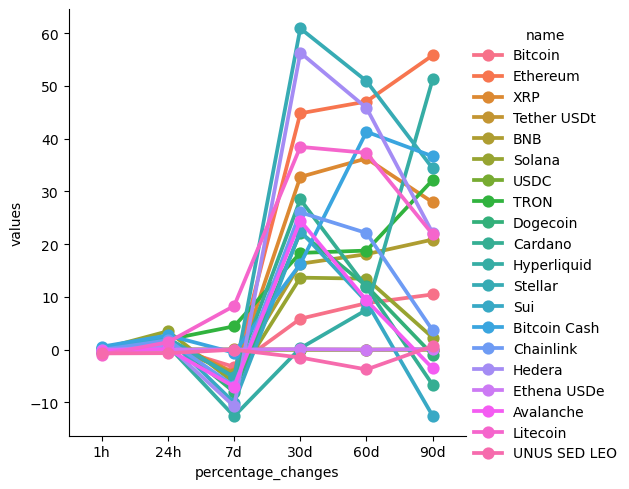

In [41]:
sns.catplot(x = 'percentage_changes',y  ='values' , hue ='name',data = df7,kind = 'point')

In [54]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,114773.25606,2025-08-07 02:50:26.108049
20,Bitcoin,114785.19282,2025-08-07 02:51:26.917449
40,Bitcoin,114785.19282,2025-08-07 02:52:27.654589
60,Bitcoin,114795.24426,2025-08-07 02:53:28.547033


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

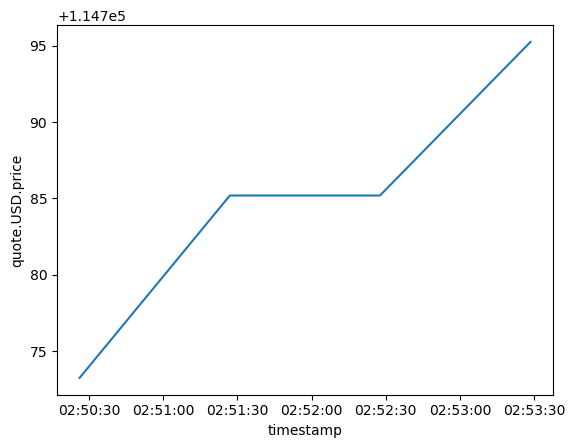

In [56]:
sns.lineplot(x ='timestamp',y = 'quote.USD.price', data = df9)